# Comparing Directional Data (e.g. wind direction)

Comparing directional data is easy from version 1.0 if the quantity is defined as directional. This happens automatically if data is loaded from a dfs file with EUM unit in "degrees" or if loaded from a xarray dataset with attribute "units" set to "degrees". The quantity can also be created as directional manually by `ms.Quantity(..., is_directional=True)`.

In the below example, the EUM unit is "degrees".

In [1]:
import modelskill as ms
import mikeio

In [2]:
fn = "examples/metocean/wave_dir.dfs0"
ds = mikeio.read(fn)
ds

<mikeio.Dataset>
dims: (time:9026)
time: 2006-12-20 22:00:00 - 2007-12-31 23:00:00 (9026 records)
geometry: GeometryUndefined()
items:
  0:  China_Model: Sign. Wave Height <Significant wave height> (meter)
  1:  China_Measured: Sign. Wave Height <Significant wave height> (meter)
  2:  China_Model: Mean Wave Direction <Mean Wave Direction> (degree)
  3:  China_Measured: Mean Wave Direction <Mean Wave Direction> (degree)

In [3]:
cmp = ms.from_matched(ds, obs_item=3, mod_items=[2])
cmp

<Comparer>
Quantity: Mean Wave Direction [degree]
Observation: China_Measured: Mean Wave Direction, n_points=9026
Model(s):
0: China_Model: Mean Wave Direction

In [4]:
cmp.quantity

Quantity(name='Mean Wave Direction', unit='degree', is_directional=True)

## SkillTable

Circular metrics are used to compare directional data if the quantity is defined as directional. 

In [5]:
cmp.skill().round(1)

,n,c_bias,c_rmse,c_urmse,c_mae
observation,,,,,
China_Measured: Mean Wave Direction,9026,28.4,60.7,57.3,50.5


## Plotting

Plots have sensible ticks and labels for directional data. 

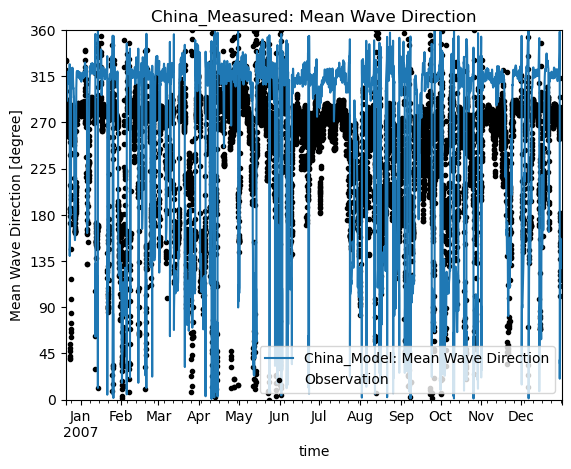

In [6]:
cmp.plot.timeseries();

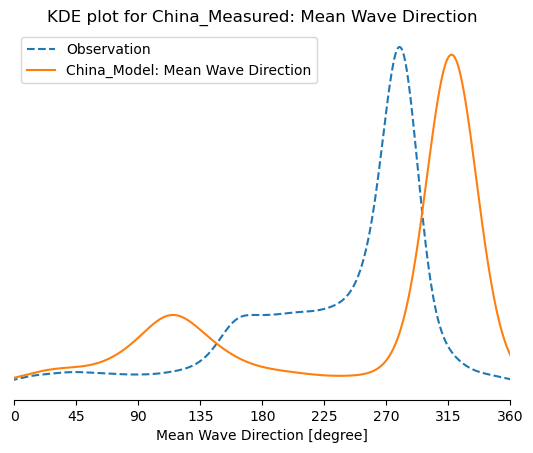

In [7]:
cmp.plot.kde();   # note: the KDE estimate is not directional! (yet)

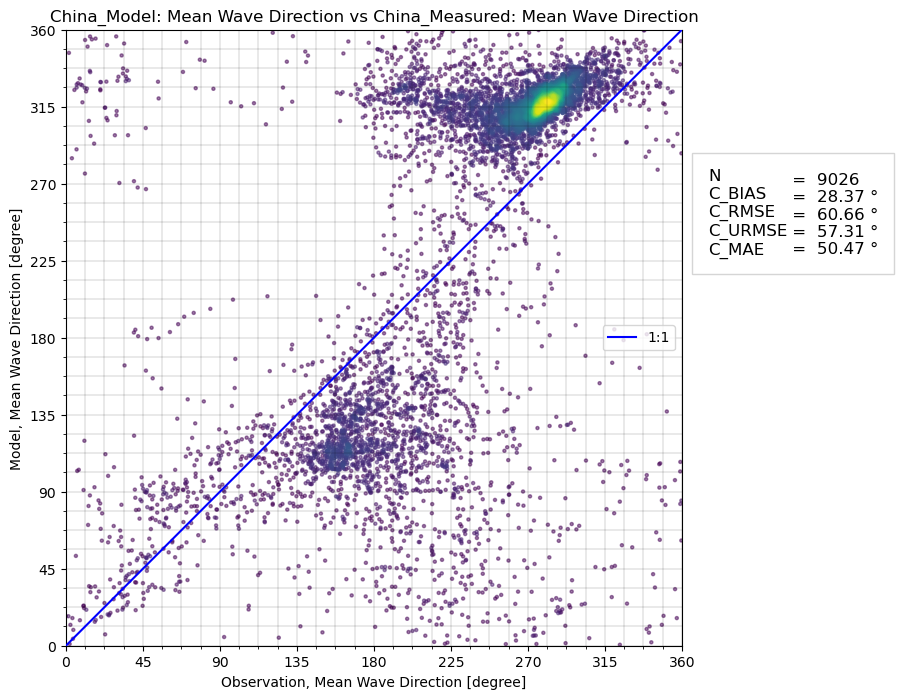

In [8]:
cmp.plot.scatter(skill_table=True);  # note: regression line and Q-Q are not shown 

## Rose plot 

In [11]:
df = ds[[0,2,1,3]].to_dataframe();
df.head()

,China_Model: Sign. Wave Height,China_Model: Mean Wave Direction,China_Measured: Sign. Wave Height,China_Measured: Mean Wave Direction
2006-12-20 22:00:00,0.300904,320.579071,0.251520,330.387634
2006-12-20 23:00:00,0.429561,316.237732,0.228478,329.593994
2006-12-21 00:00:00,0.375983,316.113342,0.201325,321.015686
2006-12-21 01:00:00,0.369684,315.344604,0.183559,311.001648
2006-12-21 02:00:00,0.406314,313.355347,0.175971,300.778778


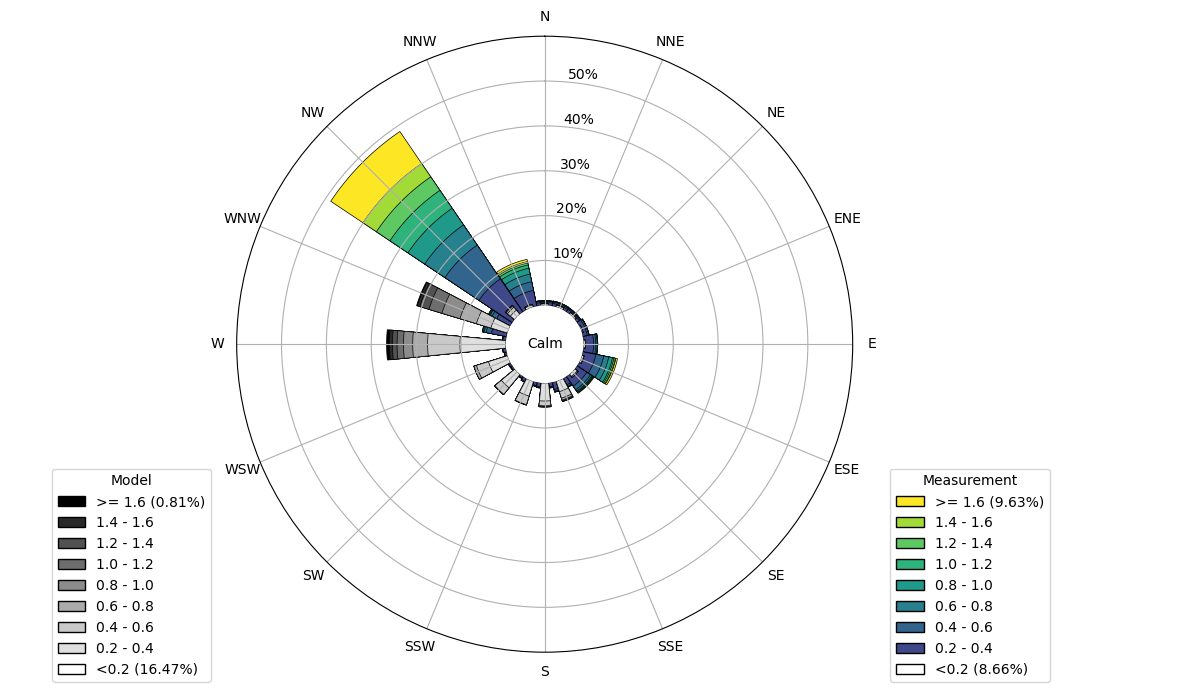

In [12]:
ms.plotting.wind_rose(df);